<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 50px"><b>But de ce Notebook</b></h2>
<p style="font-family: Arial, sans-serif; font-size: 20px; color: white;">
Dans ce notebook, nous définirons et nous visualiserons la dérive de sinistralité annuelle pour les différentes régions.
</p>

<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px"><b>Définition de la sinistralité</b></h2>

<p style="font-family: Arial, sans-serif; font-size: 20px; color:white;">
En nous inspirons de la définition de la sinsitralité donnée dans le bibliographie 2 dans le dossier bibliographies. Nous définissons le ratio de sinistralité de la façon suivante:</p>

$$
\text{dérive de sinistralité(N/N-1, Mois M, région R)} = \frac{RAC_{N,M,R}}{RAC_{N-1,M,R}} -1\\

\text{où $RAC_{N, M, R}$ est le reste à charge par personne à l'année N, le mois M, en région R}\\

\text{et $RAC_{N-1, M, R}$ est le reste à charge par personne à l'année N-1, le mois M, en région R}
$$


<p style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Librairies nécessaires</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<p style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Importation des données</p>

In [3]:
SIN_df = pd.read_csv("DBs/SIN_df.csv", index_col=0)
SIN_df.columns 

Index(['annee', 'mois', 'region', 'SIN_N/N-1'], dtype='object')

<p style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 30px; font-weight: bold">Visualisation de la dérive</p>

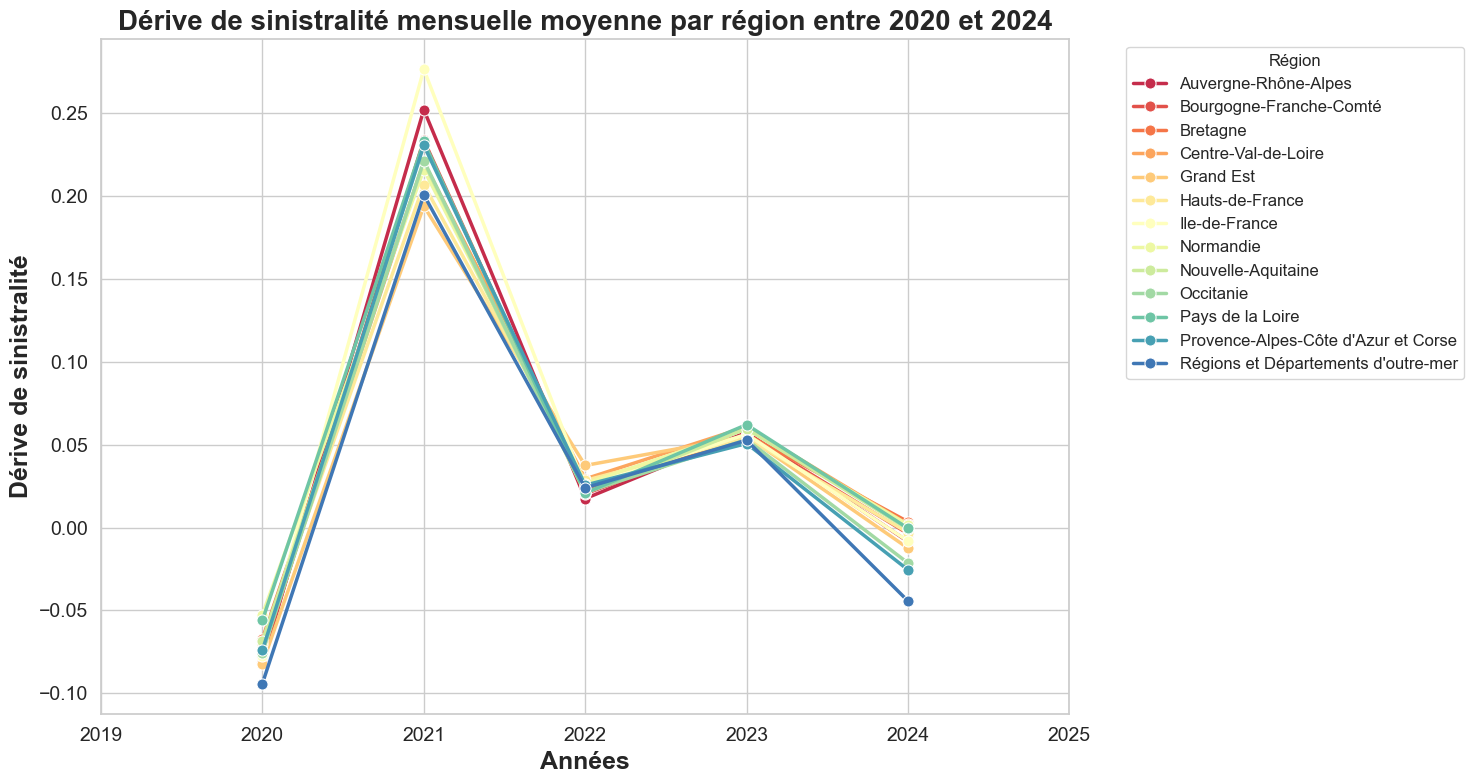

In [4]:
# Définir le style de la visualisation
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Tracer une courbe pour visualiser le reste à charge (RAC) par région entre 2019 et 2024
sns.lineplot(
    x="annee",  # Axe des x : années
    y="SIN_N/N-1",  # Axe des y : reste à charge (RAC)
    data=SIN_df,  # Données utilisées pour la visualisation
    hue="region",  # Différencier les courbes par région
    marker='o',  # Ajouter des marqueurs pour chaque point
    markersize=8,  # Taille des marqueurs
    linewidth=2.5,  # Épaisseur des lignes
    errorbar=None,  # Pas de barres d'erreur
    estimator=np.mean,  # Estimation basée sur la somme des valeurs
    palette="Spectral"  # Palette de couleurs pour différencier les régions
)

# Ajouter un titre avec une taille de police plus grande
plt.title("Dérive de sinistralité mensuelle moyenne par région entre 2020 et 2024", fontsize=20, fontweight='bold')

# Ajouter des étiquettes aux axes avec une taille de police plus grande
plt.xlabel("Années", fontsize=18, fontweight='bold')
plt.ylabel("Dérive de sinistralité", fontsize=18, fontweight='bold')

# Ajuster la taille des ticks des axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajuster les limites de l'axe des x pour inclure les années de 2018 à 2025
plt.xlim(2019, 2025)

# Placer la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Région", fontsize=12)

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

C:\Users\Ouarhim Younes\AppData\Local\Temp\ipykernel_63188\3598705165.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


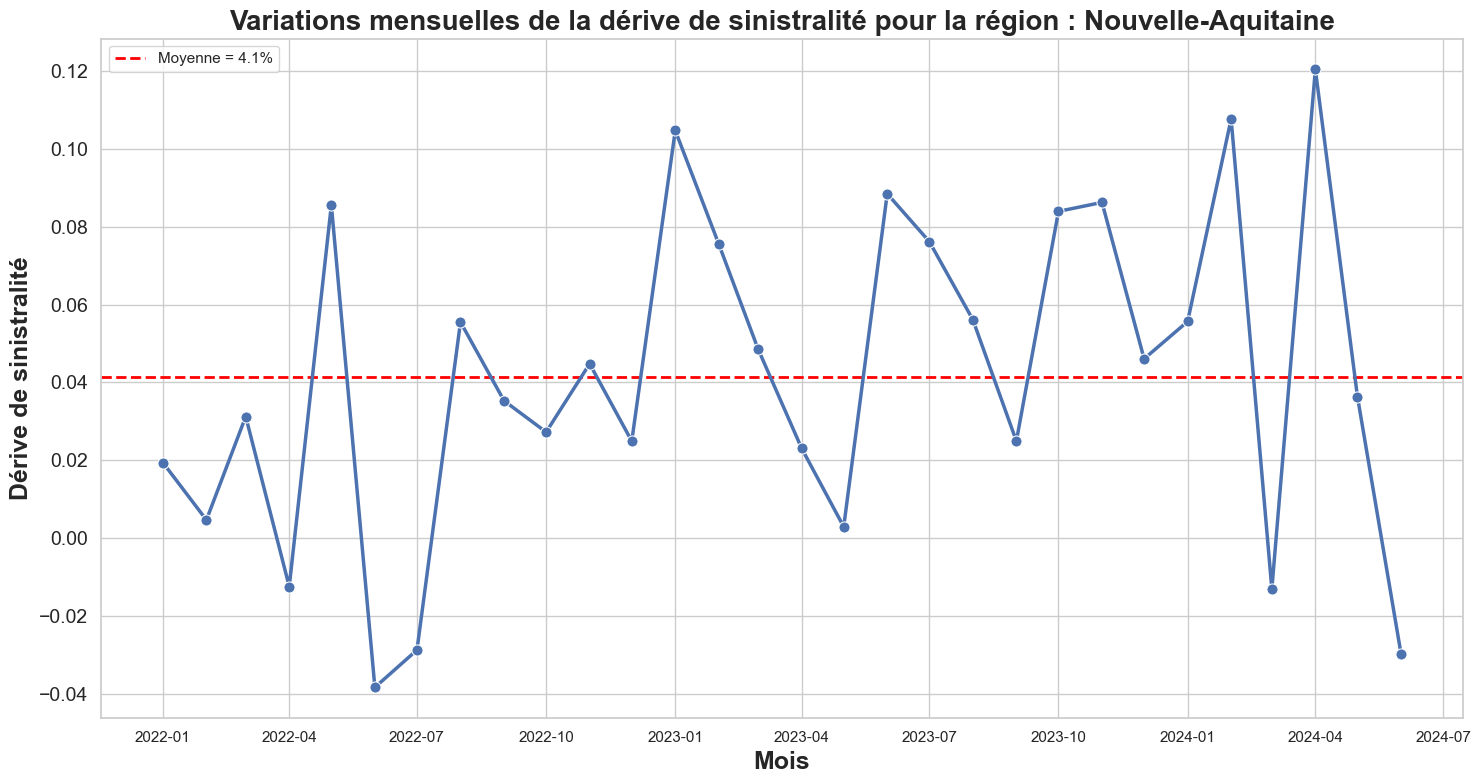

In [5]:
def tracer_variations_mensuelles(region_name):
    """
    Trace les variations mensuelles de la dérive de sinistralité pour une région donnée.

    Paramètres :
    - region_name : Nom de la région à visualiser (str)
    """
    # Filtrer les données pour la région spécifiée et les années entre 2020 et 2024
    region_df = SIN_df[SIN_df['region'] == region_name].copy()


    region_df['date'] = pd.to_datetime(dict(year=region_df['annee'], month=region_df['mois'], day=1))


    region_df = region_df[(region_df['date'] >= pd.Timestamp('2022-01-01')) & (region_df['date'] <= pd.Timestamp('2024-06-01'))] 


    # Définir le style de la visualisation
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 8))

    # Calculer la moyenne du champ SIN_N/N-1
    moyenne_sin = region_df['SIN_N/N-1'].mean()

    # Ajouter une droite horizontale à la valeur moyenne
    plt.axhline(y=moyenne_sin, color='red', linestyle='--', linewidth=2, label=f"Moyenne = {moyenne_sin*100:.1f}%")
    plt.legend(fontsize=14)

    # Tracer une courbe pour visualiser les variations mensuelles
    sns.lineplot(
        x="date",  # Axe des x : mois
        y="SIN_N/N-1",  # Axe des y : dérive de sinistralité
        data=region_df,  # Données utilisées pour la visualisation
        marker='o',  # Ajouter des marqueurs pour chaque point
        markersize=8,  # Taille des marqueurs
        linewidth=2.5,  # Épaisseur des lignes
        palette="tab10"  # Palette de couleurs
    )

    # Ajouter un titre avec une taille de police plus grande
    plt.title(f"Variations mensuelles de la dérive de sinistralité pour la région : {region_name}", fontsize=20, fontweight='bold')

    # Ajouter des étiquettes aux axes avec une taille de police plus grande
    plt.xlabel("Mois", fontsize=18, fontweight='bold')
    plt.ylabel("Dérive de sinistralité", fontsize=18, fontweight='bold')

    # Ajuster les ticks des axes
    plt.yticks(fontsize=14)

    # Placer la légende en dehors du graphique

    # Ajuster la disposition pour éviter le chevauchement
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

# Exemple d'utilisation
# choix possible de régions
region_mapping = {
    5: "Régions et Départements d'outre-mer",
    11: "Ile-de-France",
    24: "Centre-Val-de-Loire",
    27: "Bourgogne-Franche-Comté",
    28: "Normandie",
    32: "Hauts-de-France",
    44: "Grand Est",
    52: "Pays de la Loire",
    53: "Bretagne",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    84: "Auvergne-Rhône-Alpes",
    93: "Provence-Alpes-Côte d'Azur et Corse"
}
tracer_variations_mensuelles("Nouvelle-Aquitaine")  # Remplacez par la région souhaitée

> Remarque

<p style="font-family: Arial, sans-serif; font-size: 18px; color: white;">
La figure ci-dessus montre les variations mensuelles de la dérive de sinistralité pour la région sélectionnée. Elle met en évidence une tendance globale accompagnée de fluctuations spécifiques à chaque mois. La ligne rouge en pointillés indique la moyenne de la dérive sur la période étudiée, estimée à 4,1 % pour la région Nouvelle-Aquitaine. Cette valeur s'inscrit dans les ordres de grandeur habituels de la sinistralité en santé, généralement compris entre 3 % et 6 %.</p>
